# PDA data science - Machine Learning (Unsupervised)
<div class="alert alert-block alert-info"> 
    Notebook 10: by michael.ferrie@edinburghcollege.ac.uk <br> Edinburgh College, April 2022
</div>

# K-means clustering 

Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyse and cluster unlabelled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.

Exclusive clustering is a form of grouping that stipulates a data point can exist only in one cluster. This can also be referred to as “hard” clustering. The K-means clustering algorithm is an example of exclusive clustering. K-Means clustering is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them.

K-means clustering is a common example of an exclusive clustering method where data points are assigned into K groups, where K represents the number of clusters based on the distance from each groups centroid. The data points closest to a given centroid will be clustered under the same category. A larger K value will be indicative of smaller groupings with more granularity whereas a smaller K value will have larger groupings and less granularity. K-means clustering is commonly used in market segmentation, document clustering, image segmentation, and image compression.

## Applications of unsupervised learning

Machine learning techniques have become a common method to improve a product user experience and to test systems for quality assurance. Unsupervised learning provides an exploratory path to view data, allowing businesses to identify patterns in large volumes of data more quickly when compared to manual observation. Some of the most common real-world applications of unsupervised learning are:

* News Sections: Google News uses unsupervised learning to categorise articles.
* Computer vision: Visual perception tasks, such as object recognition.
* Medical imaging: Image detection, classification and segmentation, used in radiology and pathology to diagnose patients quickly and accurately.
* Anomaly detection: Anomalies can raise awareness around faulty equipment, human error, or breaches in security.
* Customer personas: Defining customer personas makes it easier to understand common traits and business clients' purchasing habits.
* Recommendation Engines: Using past purchase behaviour data to discover data trends that can be used to develop more effective selling strategies.

[More information](https://www.ibm.com/cloud/learn/unsupervised-learning) on k-means clustering and the application of unsupervised machine learning.

## A simple example

In order to illustrate clustering in operation I have created a very simple example, in the next code cell we have two datasets, these datasets are in two separate areas, we easily put them into two categories. Run the code to see the output.

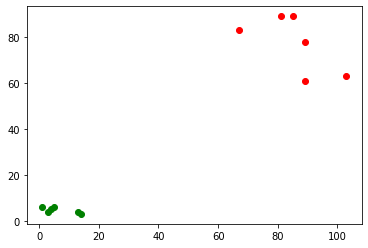

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# create example data points for one category
x = [81,67,89,103,89,85]
x2 = [89,83,61,63,78,89]

# create exmaple data points for second category
y = [1,4,5,3,14,13]
y2 = [6,5,6,4,3,4]

# plot points on chart in different colours
plt.scatter(x, x2, color='red')
plt.scatter(y, y2, color='green')
plt.show()

This is a very simple example let us say we wanted to find the centre of each of the categories we could take the mean values from each and then use that as a new data point or a decision making point. Each list has 6 values in it, so if we sum these and divide by 12 we can get a central point for each cluster.

In [2]:
# create example data points for one category
x = [81,67,89,103,89,85]
x2 = [89,83,61,63,78,89]

# create exmaple data points for second category
y = [1,4,5,3,14,13]
y2 = [6,5,6,4,3,4]

# calculate mean of x and mean of y
print("Mean of x values: " , (sum(x) + sum(x2)) / 12)
print("Mean of y values: " , (sum(y) + sum(y2)) / 12)

Mean of x values:  81.41666666666667
Mean of y values:  5.666666666666667


Using this central point we can make a decision on a new data point, lets say we had one new point of 20, which category would we put it into? Hopefully you think the green category, because 20 is closer to the mean of the y values cluster.

This illustration shows how k-means clustering groups together data points into clusters.

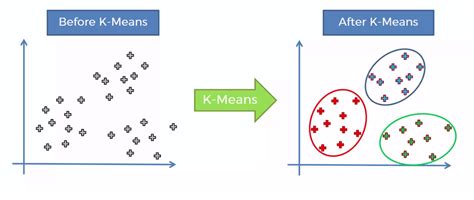

## Working example

This example is deliberately over simplified to make the process as easy to understand as possible, _obviously_ in the real world we would be doing this on a much larger dataset. However it is important not to make the dataset huge and confusing when you first learn these concepts. This on this as a pen and paper example.

In order for this to work we need to install some libraries:

On Windows `python -m pip install seaborn warnings numpy sklearn yellowbrick`

On Linux `pip install seaborn warnings numpy sklearn yellowbrick`

Then import these into the notebook, and create a small dataframe. We are going to use a tests in this example, this is a fictitious Maths test, the test was out of 100, and we will compare the grade to the hours spent studying.

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

# create dataset for testing
data = {'Grade':[91, 85, 98, 52, 65, 20, 13, 50, 48, 15], 'Hours_of_Study':[6.4, 6.1, 7.1, 5.4, 3.2, 2.8, 3.1, 2.8, 3.1, 2.1]}
 
# create pandas df from data
df = pd.DataFrame(data)

# show top of dataframe
df.head()

,Grade,Hours_of_Study
0,91,6.4
1,85,6.1
2,98,7.1
3,52,5.4
4,65,3.2


In [4]:
# show bottom of dataframe
df.tail()

,Grade,Hours_of_Study
5,20,2.8
6,13,3.1
7,50,2.8
8,48,3.1
9,15,2.1


In [72]:
# show shape of dataframe
df.shape

(10, 2)

10 , 2 means 10 rows and 2 columns, now we can visualise the data.

## Seaborn 

Seaborn is one of the world’s most regarded Python libraries that is purpose-built to create beautiful-looking visualisations. We have already imported it as `sns`. We can use the `barplot()` function to show the data, notice how it colours the bars automatically for us.

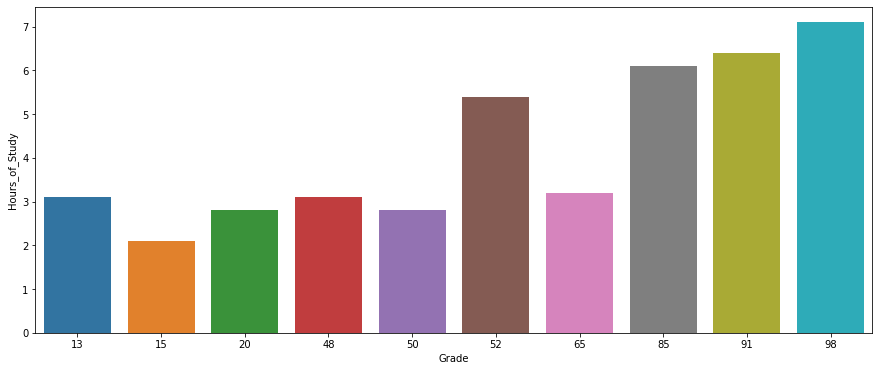

In [4]:
# set plotsize
plt.figure(figsize=(15,6))

# use barplot fuction, pass in an x an y value
sns.barplot(x = 'Grade', y = 'Hours_of_Study', data = df)

# show plot
plt.show()

Create a `countplot` just using the hours, notice there are two matching study times, the rest are unique.

<AxesSubplot:xlabel='Hours_of_Study', ylabel='count'>

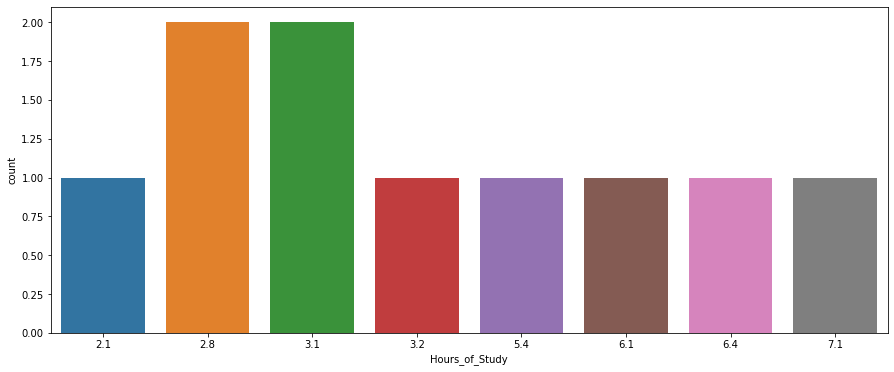

In [5]:
# set plot size
plt.figure(figsize=(15,6))

# countplot on hours variable
sns.countplot(x = 'Hours_of_Study', data = df)

Lets have a look at the statistical variance with a box plot, for this we can use the boxplot function.

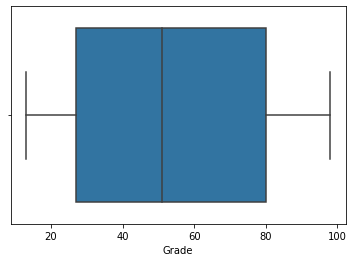

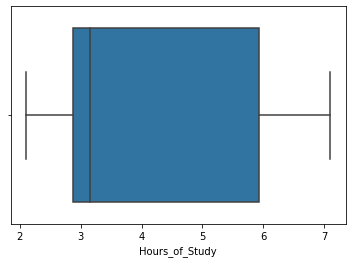

In [6]:
# Loop over the contents of the data
for item in df.columns:
    # create boxplot of item
    sns.boxplot(x=df[item], orient = 'h')
    plt.show()

Visualise the data with a scatter plot, notice there seem to be 3 categories.

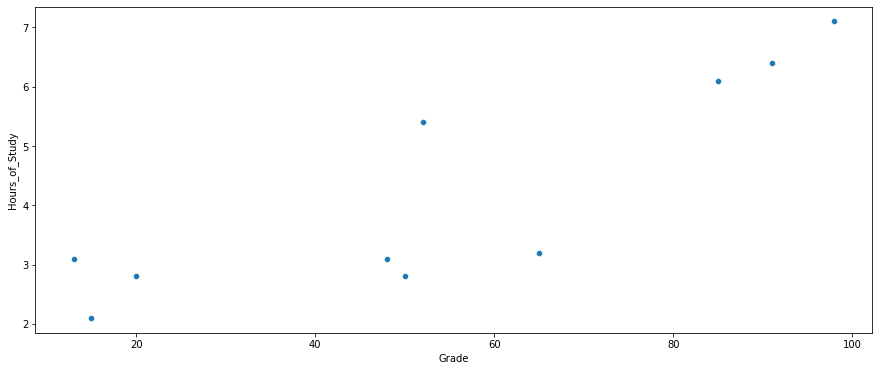

In [70]:
# set plotsize
plt.figure(figsize=(15,6))

# use barplot fuction, pass in an x an y value
sns.scatterplot(x = 'Grade', y = 'Hours_of_Study', data = df)

# show plot
plt.show()

## Put data into algorithm

There are some simple steps to this, first we import the algorithm from the `sklearn` library. As we probably already know, the people who studied for longer did better on the test.

First using the pandas `iloc` function put all the values into an array,

In [75]:
# import algorithm from sklearn
from sklearn.cluster import KMeans

# convert df to comma seperated array with iloc[:,:]
data_array = df.iloc[:,:].values

# print out array so we can see it
print(data_array)

[[91.   6.4]
 [85.   6.1]
 [98.   7.1]
 [52.   5.4]
 [65.   3.2]
 [20.   2.8]
 [13.   3.1]
 [50.   2.8]
 [48.   3.1]
 [15.   2.1]]


Now pass data to the algorithm, we are going to use the `fit_predict()` function from the algorithm on the `data_array`. Notice how it has reduced the data into 3 categories, 0, 1 and 2. Those will be our clusters.

In [77]:
# run KMeans and define number of clusters
km = KMeans(n_clusters = 3)

# fit prediction to clusters
clusters = km.fit_predict(data_array)

# print cluster groups
print(clusters)

[2 2 2 0 0 1 1 0 0 1]


Now we have the 3 clusters the algorithm numbers them starting at 0, we can use these to plot the cluster positions in the data array and specify a colour for each.

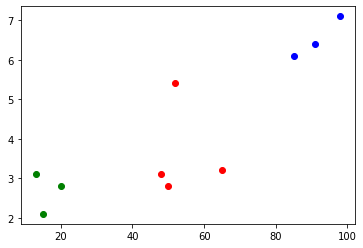

In [81]:
# plot
plt.scatter(data_array[clusters==0,0], data_array[clusters==0,1], color='red')
plt.scatter(data_array[clusters==1,0], data_array[clusters==1,1], color='green')
plt.scatter(data_array[clusters==2,0], data_array[clusters==2,1], color='blue')

## More clusters

Let's try to get the algorithm to create 5 clusters, we can just specify a larger number of clusters when we run `KMeans(n_clusters = )`. You can see there is a 3 and a 4 category now.

In [82]:
# run KMeans and define number of clusters
km = KMeans(n_clusters = 5)

# fit prediction to clusters
clusters = km.fit_predict(data_array)

print(clusters)

[1 1 4 2 3 0 0 2 2 0]


Now when we plot we can add 2 more colours, notice that the algorithm has created a new _orange_ and a _purple_ cluster. We can just specify the index values in the array and tell pyplot to assign the cluster a new colour.

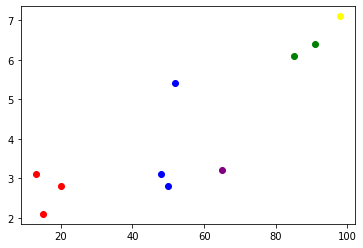

In [85]:
# plot
plt.scatter(data_array[clusters==0,0], data_array[clusters==0,1] ,color='red')
plt.scatter(data_array[clusters==1,0], data_array[clusters==1,1] ,color='green')
plt.scatter(data_array[clusters==2,0], data_array[clusters==2,1] ,color='blue')
plt.scatter(data_array[clusters==3,0], data_array[clusters==3,1] ,color='purple')
plt.scatter(data_array[clusters==4,0], data_array[clusters==4,1] ,color='yellow')

## Deciding the number of clusters

he K Means algorithm aims to assign the data points in your dataset to K distinct clusters. After running the algorithm each observation (data point) will belong to the cluster whose centre it is closest to. But how does it make that decision?

The algorithm uses a method called the __elbow__ method. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. 

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases. To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph. [More information](https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet)

Lets have a look at this in our dataset. First we need to create an empty list, we know we have 10 datapoints, so we are going to loop over them and use the `km_inertia_` method on the data.

In [107]:
# create empty list
data = []

# loop over the list
for item in range(1,10):
    km = KMeans(n_clusters=item)
    km.fit_predict(df)
    data.append(km.inertia_)

# have a look at the results, numbers have been ordered by the algorithm
print(data)

[8830.149000000001, 2387.9983333333334, 292.7575, 123.76666666666667, 56.61833333333333, 32.59166666666667, 14.546666666666667, 4.545, 2.045]


Let's see what this looks like visually, you can see that the __elbow__ of the data diminishes at 3, this means that there are 3 natural clusters in the dataset according to the algorithm. Although we were able to force it to use 5 as a test, we can see there are 3.

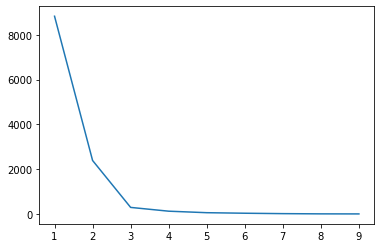

In [113]:
# plot chart
plt.plot(range(1,10), data)

Sometimes it is easier to visualise the chart with the grid turned on, and making it a bit bigger.

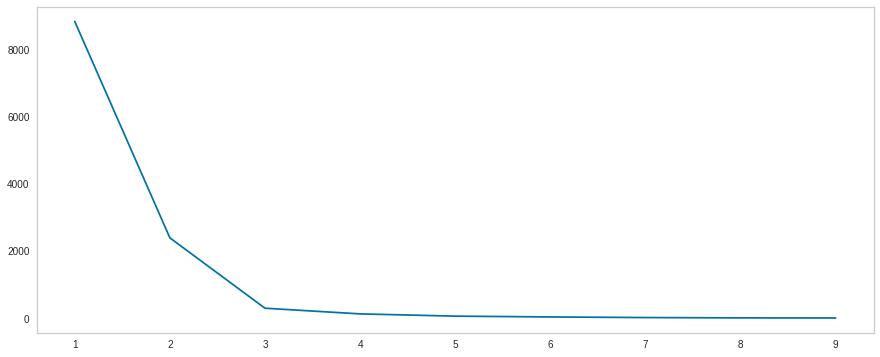

In [123]:
# set chart size
plt.figure(figsize=(15,6))

# add grid
plt.grid()

# plot chart
plt.plot(range(1,10), data)

This shows the location of the elbow, the point of diminishing returns, the optimal number of clusters is 3

![elbow](https://michaelferrie.com/labs/elbow.gif)

### Yellowbrick visualiser

The `yellobrick` library has a nice visualisaer for this type of chart, run the KElbowVisualizer function on the `df` against our model `km`.

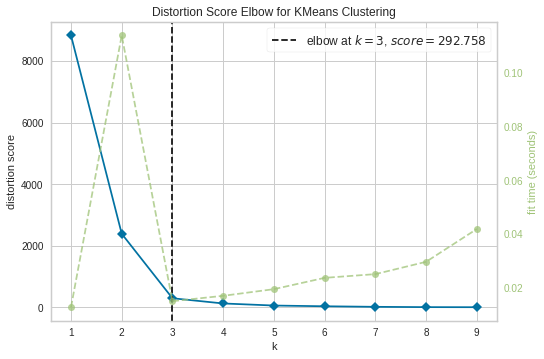

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
# import elbow visualiser
from yellowbrick.cluster import KElbowVisualizer

# run visualiser
visualizer = KElbowVisualizer(km, k=(1,10)).fit(df)
visualizer.show()

# Topic Summary

In this notebook we have looked at a pen and paper example of the K-means clustering unsupervised machine learning algorithm with a very small dataset. 

### Key takeaways

* The algorithm an example of unsupervised learning
* We can import the algorithm from `sklearn`
* We can use `seaborn` for quick visualisations
* The algorithm works by calculating centroid points in a dataset
* Each centroid becomes the root of the cluster
* The number of clusters can be calculated using `km.intertia_`
* We can visualise this and find the point of diminishing returns
* We can use `pyplot` to create scatter plots of the data visualising the different clusters with colours

### K-means clustering limitations

* If data is not well separated it can be difficult to define cluster centre points
* K-means clustering is sensitive to outliers
* K-means works well if the data can be easily categorized

# Questions

In this notebook we will practice K-means clustering on the __iris__ dataset. If you are unfamiliar with the iris dataset have a read of the [overview](https://archive.ics.uci.edu/ml/datasets/Iris).

1 Create a new dataframe called `df` from the dataset., use the `iris.csv` file from Moodle?

In [137]:
# answer in this cell


2 Write the code to print the output of the following pandas functions, describe, head, tail, shape, columns, value_counts?

In [1]:
# answer in this cell


3 Write the code to create a bar plot with `seaborn`, use sepal.length for the x axis and sepal.width for the y axis?

In [2]:
# answer in this cell


4 Write the code to create a scatter plot with `seaborn`, use petal.width for the x axis and petal.length for the y axis?

In [3]:
# answer in this cell


5 Write the code to create a count plot with `seaborn` of sepal width?

In [4]:
# answer in this cell


6 Write the code to create a count plot with `seaborn` of petal width?

In [5]:
# answer in this cell


7 Create a box plot with `seaborn` that uses variety on the x axis and petal length on the y axis?

In [6]:
# answer in this cell


8 Visualise the whole dataset use the `seaborn` `pairplot()` function on the whole `df`?

In [7]:
# answer in this cell


9 Make a new dataframe called `df_petal` add the `petal.length` and `petal.width` columns to the dataframe?

In [8]:
# answer in this cell


10 Create a new empty list called `data` loop over the `df_petal` dataframe and calculate the KMeans data, set the range in the loop as (1,11), print out the `data` list?

In [9]:
# answer in this cell


11 Use `yellowbrick` to visualise an elbow plot of `df_petal`, you should see that `yellowbrick` is advising k=2, even though we know there are 3 plant varieties, note the sharp drop off after 3?

In [10]:
# answer in this cell


12 Put the data into an array using `iloc` and `values`, print out the array?

In [11]:
# answer in this cell


13 Set the `n_clusters` to 3 and use `fit_predict` on the `data_array`, print out the clusters?

In [13]:
# answer in this cell


14 Plot the data array in a scatter plot, assign a colour for each cluster?

In [12]:
# answer in this cell


15 Create a new dataframe called `df_sepal` this time repeat the steps taken from questions 9-14, this time use the KMeans algorithm on the `sepal.length` and `sepal.width` to create a scatter plot with 3 colours, set the `n_clusters` to 3 in the algorithm?

In [ ]:
# answer in this cell
